In [1]:
import pandas
df = pandas.read_csv('Data/salary.csv',index_col = 0)
df.head()

,year,salary
1,2.4,6600
2,5.5,10100
3,3.3,7300
4,0.2,5000
5,1.5,6100


In [2]:
from matplotlib import pyplot as plt
X = df[['year']]
Y = df['salary'].values

Populating the interactive namespace from numpy and matplotlib


Text(0,0.5,'salary')

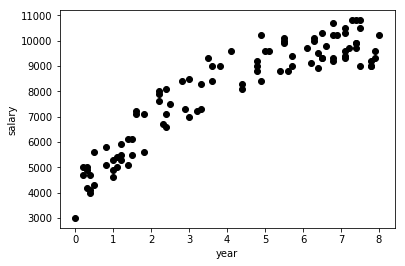

In [8]:
%pylab inline
plt.scatter(X,Y,color="black")
plt.xlabel('year')
plt.ylabel('salary')

In [9]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
print('Coefficient:{}'.format(regr.coef_))
print('Intercept:{}'.format(regr.intercept_))

Coefficient:[712.59413615]
Intercept:5049.009899813836


In [17]:
regr.predict(2)

array([6474.1981721])

Text(0,0.5,'salary')

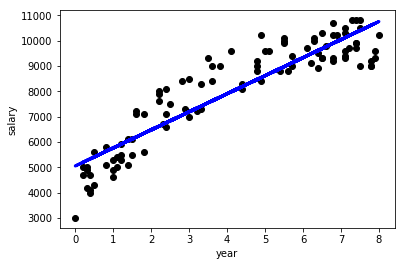

In [18]:
plt.scatter(X,Y, color="black")
plt.plot(X,regr.predict(X),linewidth=3,color='blue')
plt.xlabel('year')
plt.ylabel('salary')

In [19]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_reg = PolynomialFeatures(degree = 2)
X_ = poly_reg.fit_transform(X)
regr = LinearRegression()
regr.fit(X_,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [24]:
X2 = X.sort_values(['year'])
X2_ = poly_reg.fit_transform(X2)

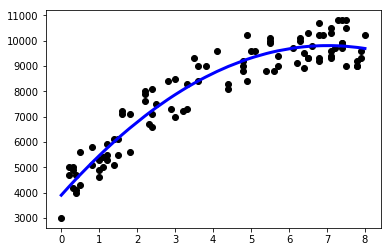

In [26]:
plt.scatter(X,Y,color = "black")
plt.plot(X2,regr.predict(X2_),color = "blue",linewidth = 3)

## 多元回归模型

In [28]:
import pandas
df = pandas.read_csv('Data/house-prices.csv')
df.head()

,Home,Price,SqFt,Bedrooms,Bathrooms,Offers,Brick,Neighborhood
0,1,114300,1790,2,2,2,No,East
1,2,114200,2030,4,2,3,No,East
2,3,114800,1740,3,2,1,No,East
3,4,94700,1980,3,2,3,No,East
4,5,119800,2130,3,3,3,No,East


In [30]:
# pandas.get_dummies(df['Brick'])
# pandas.get_dummies(df['Neighborhood'])

In [36]:
house = pandas.concat([df,pandas.get_dummies(df['Brick']),pandas.get_dummies(df['Neighborhood'])],axis = 1)
del house['No']
del house['West']
del house['Brick']
del house['Neighborhood']
del house['Home']
house.head()

,Price,SqFt,Bedrooms,Bathrooms,Offers,Yes,East,North
0,114300,1790,2,2,2,0,1,0
1,114200,2030,4,2,3,0,1,0
2,114800,1740,3,2,1,0,1,0
3,94700,1980,3,2,3,0,1,0
4,119800,2130,3,3,3,0,1,0


In [38]:
X = house[['SqFt','Bedrooms','Bathrooms','Offers','Yes','East','North']]
Y = house['Price'].values

In [39]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
regr.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [40]:
regr.predict(X)

array([103182.88325028, 116127.48050967, 113047.47841973, 109230.99957752,
       125063.33919194, 108460.31885328, 148704.1829466 , 153525.7716034 ,
       120366.97977446, 103865.84286795, 129178.03614553, 124719.73204259,
        98814.52852196, 128446.1660185 , 167661.38200801, 141655.63841392,
       137272.82484975, 110937.30627969, 123978.2844232 , 161741.1079378 ,
        99162.18882362, 103583.96519486,  95423.39386208, 119609.92969489,
       159114.47019421, 139349.71073264, 136779.2847555 , 102660.24046903,
        86407.16329753, 180614.63904496, 175208.34797844, 129459.93561064,
       148719.93761665, 150535.84930595, 107604.65962152, 123974.23127089,
       109512.89904262, 158652.44607031, 134229.22007367, 106340.56922088,
        99261.81118229, 144451.05303714, 105514.14309396, 139883.70129304,
       162800.982754  , 100222.06363982, 123225.48902465,  89698.67559875,
       113251.69400417, 113250.68079769, 132887.59800223, 100185.53590812,
       115169.51091764, 1